<a href="https://colab.research.google.com/github/SaiDhanyaa/WORK-OUTS/blob/main/REGULARISATION_METHODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [ ]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
#print(boston_dataset.DESCR)

In [ ]:
#Load the data and divide into X and Y varaiable
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 

In [ ]:
# input 
X = boston_pd.iloc[:, :-1] 

In [ ]:
#output 
Y = boston_pd.iloc[:, -1]

In [ ]:
print(boston_pd.head()) 

      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House Price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]


In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)


((379, 13), (379,), (127, 13), (127,))

In [ ]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

In [ ]:
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 




Mean squared Error on test set :  22.052308908065353


In [ ]:
# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

    Columns  Coefficient Estimate
0      CRIM             -0.112804
1        ZN              0.047251
2     INDUS              0.038577
3      CHAS              3.357129
4       NOX            -18.364158
5        RM              3.799200
6       AGE             -0.011336
7       DIS             -1.558506
8       RAD              0.346955
9       TAX             -0.014678
10  PTRATIO             -0.988083
11        B              0.009644
12    LSTAT             -0.468772


In [ ]:
##VISUALISATION

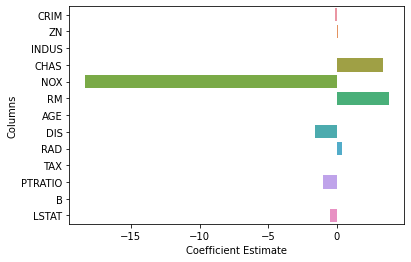

In [ ]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

# **import ridge regression from sklearn library**

In [ ]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 



22.02740391529609
    Columns  Coefficient Estimate
0      CRIM             -0.108434
1        ZN              0.048238
2     INDUS              0.000468
3      CHAS              3.093794
4       NOX            -10.125369
5        RM              3.865487
6       AGE             -0.018941
7       DIS             -1.434221
8       RAD              0.325858
9       TAX             -0.015152
10  PTRATIO             -0.885161
11        B              0.010112
12    LSTAT             -0.476930


In [ ]:
##VISUALISATION

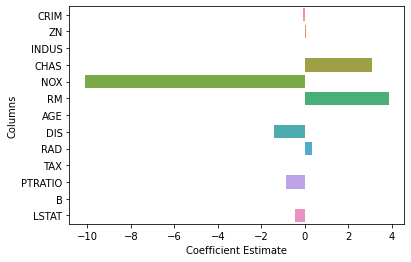

In [ ]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

## **import Lasso regression from sklearn library**

In [ ]:
# import Lasso regression from sklearn library 

from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) #### CHECK FOR ALPHA= 0.9,0.5 AND CORRESPONDING MSE TO GET REDUCED ERROR)
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 25.066750030572408
    Columns  Coefficient Estimate
0      CRIM             -0.068256
1        ZN              0.042969
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.230561
6       AGE              0.008474
7       DIS             -0.644247
8       RAD              0.251746
9       TAX             -0.014690
10  PTRATIO             -0.676704
11        B              0.008848
12    LSTAT             -0.697438


In [ ]:
##VISUALISATION

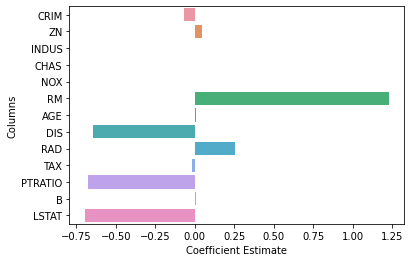

In [ ]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

# **import ELASTIC NET model**

In [ ]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5)  #### (ALPHA IS CONTROLLING FACTOR, AND L1_RATION IS THE R VALUE WHICH GIVES HOW MUCH CONTRIBUTION THE LASSO AND RIDGE GIVES.)
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 22.907845248504987


,Columns,Coefficient Estimate
0,CRIM,-0.095764
1,ZN,0.051926
2,INDUS,-0.012754
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.130509
6,AGE,-0.006130
7,DIS,-1.050144
8,RAD,0.325354
9,TAX,-0.017383


In [ ]:
##VISUALISATION

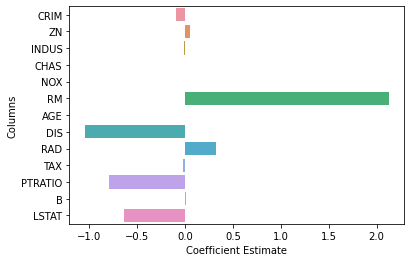

In [ ]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)